In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
df = pd.read_csv("./data/K-Data.csv")

/var/folders/78/9j91h4q516z7774553xzp19m0000gn/T/ipykernel_51228/2728384747.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/K-Data.csv")


In [206]:
# Therefore different units can be recorded from different experiement but in the same session we should be able to assume that
# the the neuron index is just u - Will need to check

print(df.query("region == 'V1'").query("u == 32").e.unique())
print(df.query("region == 'V1'").query("u == 32").s.unique())
print(df.query("region == 'V1'").query("u == 32").unit_type.unique())

[2 5]
[4]
['excit']


In [207]:
v1 = df.query("region == 'V1'")
m = v1.m.unique()[2]
v1_data = v1[v1.m == m]
# v1_data = v1_data.query("grat_spat_freq == 0.332966").query("grat_phase == [180]")
v1_data = v1_data[['u', 'unit_type', 'grat_orientation', 'grat_contrast', 'response', 'smoothed_response']].reset_index(drop=True)

In [208]:
data = v1[v1.m == m]
orientations = data.grat_orientation.unique()
contrasts = data.grat_contrast.unique()
spatial_frequencies = data.grat_spat_freq.unique()
phases = data.grat_phase.unique()
units = sorted(data.u.unique())

In [209]:
spatial_frequencies

array([0.01     , 0.0240215, 0.0577032, 0.138612 , 0.332966 , 0.799834 ])

In [210]:
phases

array([  0,  90, 180, 270])

In [211]:
v1_data.query("unit_type != 'excit'").head()
#  'grat_spat_freq', 'grat_phase'
v1_data = v1_data[['u', 'unit_type', 'grat_orientation', 'grat_contrast', 'response', 'smoothed_response']].reset_index(drop=True)
v1_data = v1_data.groupby(['unit_type','u', 'grat_contrast', 'grat_orientation'], as_index=False).mean()

In [212]:
len(v1_data)

8160

In [213]:
v1_data.head()

,unit_type,u,grat_contrast,grat_orientation,response,smoothed_response
0,excit,2,0.0,0,0.000763,0.000828
1,excit,2,0.0,15,0.000995,0.000984
2,excit,2,0.0,30,0.001027,0.001104
3,excit,2,0.0,45,0.000988,0.000923
4,excit,2,0.0,60,0.000696,0.000765


In [214]:
v1_data.to_csv('./data/v1_data.csv', index=False)

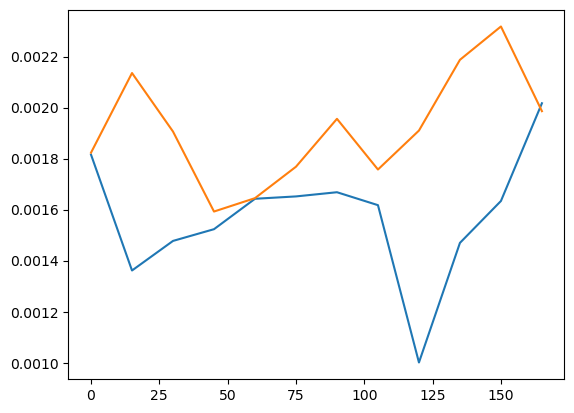

In [215]:
con1 = "0.464386"
con2 = "1"
neuron = "2"

test_orientations = v1_data.query(f"u == {neuron}").query(f"grat_contrast == {con1}").grat_orientation.to_list()
test_responses = v1_data.query(f"u == {neuron}").query(f"grat_contrast == {con1}").response.to_list()
plt.plot(test_orientations, test_responses)

test_orientations = v1_data.query(f"u == {neuron}").query(f"grat_contrast == {con2}").grat_orientation.to_list()
test_responses = v1_data.query(f"u == {neuron}").query(f"grat_contrast == {con2}").response.to_list()
plt.plot(test_orientations, test_responses)

plt.show()

In [216]:
contrasts

array([0.       , 0.0432773, 0.103411 , 0.186966 , 0.303066 , 0.464386 ,
       0.68854  , 1.       ])

In [217]:
v1_data.u.unique()

array([ 2,  4,  6,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43,
       44, 45, 46, 47, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 73, 74, 77, 78, 80, 81, 82, 83, 84, 86, 87,
       89, 90, 91, 92,  5,  7,  8, 10, 58, 71, 72, 79])

In [218]:
# n_u = len(units)
# n_spat = len(spatial_frequencies)
# tuning_curves = np.zeros([n_u * n_spat, len(contrasts), len(orientations)])


In [219]:
# for i, tc in enumerate(tuning_curves):
#     plt.imshow(tc)
#     plt.show()

In [220]:
# v1_data

# Assuming df is your DataFrame
# Replace df with the actual name of your DataFrame

# Get unique values for each column
unique_u = v1_data['u'].unique()
unique_contrast = v1_data['grat_contrast'].unique()
unique_orientation = v1_data['grat_orientation'].unique()

# Create a 3D numpy array filled with NaN values
shape = (len(unique_u), len(unique_contrast), len(unique_orientation))
result_array = np.full(shape, np.nan)

# Iterate through the DataFrame and fill the array
for index, row in v1_data.iterrows():
    u_index = np.where(unique_u == row['u'])[0][0]
    contrast_index = np.where(unique_contrast == row['grat_contrast'])[0][0]
    orientation_index = np.where(unique_orientation == row['grat_orientation'])[0][0]
    
    result_array[u_index, contrast_index, orientation_index] = row['response']

# Now result_array contains the 3D array you're looking for


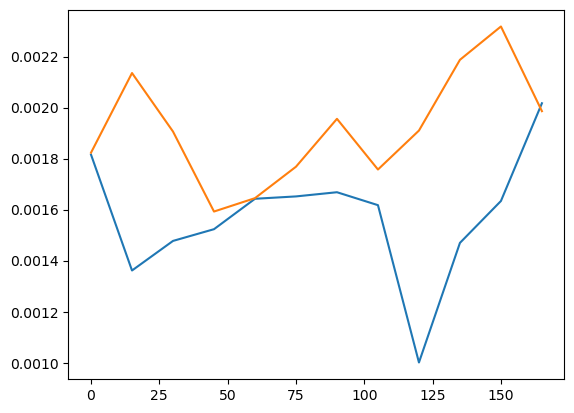

In [221]:
# plt.plot(unique_orientation, result_array[0][0])
# plt.plot(unique_orientation, result_array[0][1])
# plt.plot(unique_orientation, result_array[0][2])
# plt.plot(unique_orientation, result_array[0][3])
# plt.plot(unique_orientation, result_array[0][4])
plt.plot(unique_orientation, result_array[0][5])
plt.plot(unique_orientation, result_array[0][7])
# plt.plot(unique_orientation, result_array[0][6])
plt.show()

In [187]:
print(result_array[None, :, :, :].shape)
print(result_array[:, None, :, :].shape)

(1, 80, 8, 12)
(80, 1, 8, 12)


In [204]:
def kernel(x, y, w=1, axes=(-2,-1)):
    return np.exp( - np.sum((x - y)**2, axis=axes) / (2 * w**2))

np.mean(kernel(result_array[None, :, :, :], result_array[:, None, :, :]).shape)

80.0

In [199]:
len(result_array[0:50][None, :, :, :])

1